# Example Calculations, Plots, Tables

$\bullet$ Units: uJ for energy, uJ/um^2 for fluence, um for lengths unless stated otherwise

There might be slight changes to the outputs because of tinkering to the input codes for prettifying the plots and so on. Would advise to rerun the entire notebook.

In [1]:
# Loading necessary libraries
from tests import *

## Data Points

In [2]:
# Example: %change in loss over mean loss plot
# Initializes a Gaussian beam of E_p=0.001 uJ, w=20um and collects loss data for each 1um translation of graphene layers with
# configurations (graphene_width, blank_width)

test_beam_1 = beam_initialize_fast(Ep=0.001,w=20,res=30, threshold=10**-15)
dataset_1 = variation_checker(test_beam_1, [(i,i) for i in range(2,60,2)])
# Contents of dataset_1: First element is a list that contains the sliding offset vs loss% data of configurations,
                        #Second element is a list of configurations vs their %change in loss over mean loss.
print(dataset_1[1])  # Put the values for d_tot<w in the article to showcase the error rate 
                     # of the assumption that there is negligible variance wrt translation

[0.0, 0.0, 0.00657487411855802, 0.1538519700777627, 1.8199235605805058, 7.07191910292614, 17.527277474838225, 32.41278335111972, 49.770409383938855, 67.7921080592053, 85.24975837354465, 101.4711248598733, 116.16205014344587, 129.24862250786347, 140.76799317616033, 150.8037671519261, 159.4667398925977, 166.88058110113636, 173.16742992753117, 178.4509559684788, 182.84962156956422, 186.47899606568959, 189.44159525672055, 191.8373905028577, 193.75198725213096, 195.2669066323695, 196.4517395695533, 197.3669772391032, 198.06501878766161]


In [3]:
# Example plot for simulation vs hypothesis, superimposed, using constants embedded in tests.py

sim_dat_2, hypo_dat_2, _ = hypothesis_calculator(hc_E_p=0.001, hc_w=25, hc_d_tot=40, hc_p_gph=0.5)

# The two datasets will be out of phase as the simulation does not begin at the same place as the hypothesis
# Will match the phases by hand, easy to see that  max val of sim must be at the same place as hyp
# See the docstrings and functions in beam.py and tests.py for more information on alignments and startpoints

In [4]:
# Error% table for the hypothesis, non-tilted; constants as defaulted in tests.py

beam_pd_3 = generic_tester_Eenc(E_p_vals=[0.001,0.00001], w_vals=[20,30], d_tot_vals=[40,50], p_gph_vals=[0.3,0.7])

$\bullet$ *Note:* For the tables, mind that the listed E_p vals are the ones strived for, discretized calculations are off to some degree, the hypothesis is compared to that of the simulated. In the article, there will be no indexing numbers and no err_pc_Ep column, also there will be two significant figures only, which would render mentioning the use of actualized E_p instead of the strived one irrelevant.

In [5]:
# Error% table for the hypothesis, tilted parallel to the major axis at brewster angle of graphene
# Constants as defaulted in tests.py
beam_tiltmajor_pd_4 = generic_tester_tilted_Eenc(E_p_vals=[0.001,0.00001], w_vals=[20,30], d_tot_vals=[40,50], p_gph_vals=[0.3,0.7],\
                                          theta_vals=[brewster_calc()])

In [6]:
# Loss plots for elliptical cases, major axis vs minor axis, side-by-side

# Example: %change in loss over mean loss plot
# Initializes a Gaussian beam of E_p=0.001 uJ, w=20um and collects loss data for each 1um translation of graphene layers with
# configurations (graphene_width, blank_width)

test_beam_major_6 = beam_inittilt(Ep=0.001,w=20,res=30, length=120, deg=brewster_calc(), is_x=True)
dataset_6 = variation_checker(test_beam_major_6, [(i,i) for i in range(2,26,2)])
    
test_beam_minor_7 = beam_inittilt(Ep=0.001,w=20,res=30, length=120, deg=brewster_calc(), is_x=False)
dataset_7 = variation_checker(test_beam_minor_7, [(i,i) for i in range(2,40,2)])

# Contents of dataset_x: First element is a list that contains the sliding offset vs loss% data of configurations,
                        #Second element is a list of configurations vs their %change in loss over mean loss.

print(dataset_6[1])
print(dataset_7[1])

[0.0, 0.0, 0.01784595119981526, 0.2167002605183262, 1.6163346679566717, 6.503560684603225, 16.794296949938968, 31.691826244355433, 49.14258115824308, 67.26767073373209, 84.81924024933342, 101.12655132844675]
[0.0038241283377482707, 0.012747094459148761, 0.026768898364225756, 0.11472421573251536, 0.0701090195253607, 0.07265832264438012, 0.20522822079242986, 0.5876403523133348, 1.9209844142204962, 4.506102199290177, 8.683338354926184, 14.64258351668342, 21.992551288031997, 30.73961129110055, 40.39296717752739, 50.540985020362484, 60.85721259128705, 71.09430699331537, 81.07657880233059]


In [7]:
# Checking that Eq.4 (where E_msa is defined) yields the desired output E_p for d_tot<w with negligible error:
# Mind that we know by investigation with \% change in loss over mean loss data, there is negligible variation wrt translation

# Will simulate resultant E_p for some example d_tot<w cases and compare the average with Eq.4

print(ave_vs_Emsa(hc_E_p=0.001,hc_w=25,hc_d_tot=10,hc_p_gph=0.5), '%')
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=25,hc_d_tot=10,hc_p_gph=0.5), '%')
print(ave_vs_Emsa(hc_E_p=0.001,hc_w=35,hc_d_tot=25,hc_p_gph=0.3), '%')
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=25,hc_p_gph=0.7), '%')

-0.018252438079549994 %
-0.01658005696663986 %
-0.00042283529349039864 %
-0.00827496440199572 %


## Plots, Tables

Final touches for the plots for publication, such as more explanatory labels for axes. In the article the error in predictions of Eq (5) and (6) will be concatenated together for respective parameters.

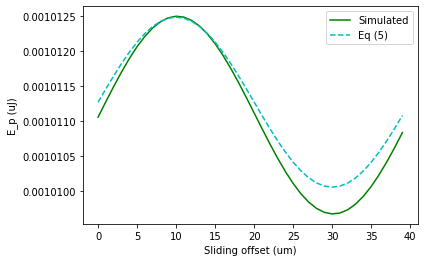

In [8]:
# Example plot for simulation vs hypotheses, superimposed
# Data from the third box

sim_dat_2_shifted = sim_dat_2[35:]+sim_dat_2[0:35]  # The reason behind this shift is explained in the data points section
plt.plot(sim_dat_2_shifted, 'g', label="Simulated")
plt.plot(hypo_dat_2, '--c', label="Eq (5)")
plt.xlabel('Sliding offset (um)')
plt.ylabel('E_p (uJ)')
plt.legend()
plt.savefig('Fig_sliding_example_new.pdf',bbox_inches='tight')
plt.show()

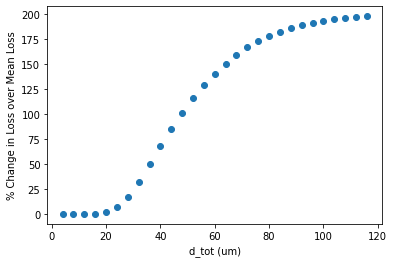

In [9]:
# Prettified version of the second box, will only use the \% change in loss over mean loss data
plt.plot([2*i for i in range(2,60,2)], dataset_1[1],'o')
plt.ylabel(r'% Change in Loss over Mean Loss')
plt.xlabel('d_tot (um)')
plt.savefig('Fig_change_loss_1_new.pdf',bbox_inches='tight')
plt.show()

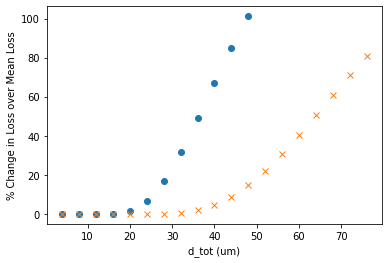

In [10]:
# Tilted variant, comparison of major vs minor axes cases of the seventh box
plt.plot([2*i for i in range(2,26,2)], dataset_6[1],'o',label="Major axis parallel")
plt.plot([2*i for i in range(2,40,2)], dataset_7[1],'x',label="Major axis perpendicular")
plt.ylabel(r'% Change in Loss over Mean Loss')
plt.xlabel('d_tot (um)')
plt.legend()
plt.savefig('Fig_change_loss_2_tilt_new2.pdf',bbox_inches='tight')
plt.show()

In [11]:
print(beam_pd_3.to_latex(index=False))

\begin{tabular}{rrrrrr}
\toprule
     E\_p &     w &  d\_tot &  p\_gph &  err\_pc\_at\_max &  err\_pc\_at\_min \\
\midrule
 0.00100 &  20.0 &   40.0 &    0.3 &       0.026337 &      -0.050737 \\
 0.00100 &  20.0 &   40.0 &    0.7 &       0.025515 &      -0.056420 \\
 0.00100 &  20.0 &   50.0 &    0.3 &       0.060672 &      -0.115605 \\
 0.00100 &  20.0 &   50.0 &    0.7 &       0.090875 &      -0.092352 \\
 0.00100 &  30.0 &   40.0 &    0.3 &      -0.019695 &       0.019500 \\
 0.00100 &  30.0 &   40.0 &    0.7 &      -0.018104 &       0.019779 \\
 0.00100 &  30.0 &   50.0 &    0.3 &       0.005929 &      -0.007623 \\
 0.00100 &  30.0 &   50.0 &    0.7 &       0.009693 &      -0.007034 \\
 0.00001 &  20.0 &   40.0 &    0.3 &       0.112373 &      -0.148729 \\
 0.00001 &  20.0 &   40.0 &    0.7 &       0.107096 &      -0.162891 \\
 0.00001 &  20.0 &   50.0 &    0.3 &       0.182515 &      -0.265426 \\
 0.00001 &  20.0 &   50.0 &    0.7 &       0.223322 &      -0.235699 \\
 0.00001 &  3

In [12]:
print(beam_tiltmajor_pd_4.to_latex(index=False))

\begin{tabular}{rrrrrrrr}
\toprule
     E\_p &     w &  d\_tot &     theta &  p\_gph &  err\_pc\_at\_max &  err\_pc\_at\_min &  err\_pc\_Ep \\
\midrule
 0.00100 &  20.0 &   40.0 &  0.967047 &    0.3 &      -0.078110 &      -0.175393 &   2.396917 \\
 0.00100 &  20.0 &   40.0 &  0.967047 &    0.7 &      -0.233420 &      -0.336261 &   2.396917 \\
 0.00100 &  20.0 &   50.0 &  0.967047 &    0.3 &      -0.039378 &      -0.244679 &   2.396917 \\
 0.00100 &  20.0 &   50.0 &  0.967047 &    0.7 &      -0.163528 &      -0.376859 &   2.396917 \\
 0.00100 &  30.0 &   40.0 &  0.967047 &    0.3 &      -0.150886 &      -0.112008 &   2.371713 \\
 0.00100 &  30.0 &   40.0 &  0.967047 &    0.7 &      -0.326604 &      -0.289024 &   2.371713 \\
 0.00100 &  30.0 &   50.0 &  0.967047 &    0.3 &      -0.120370 &      -0.143711 &   2.371713 \\
 0.00100 &  30.0 &   50.0 &  0.967047 &    0.7 &      -0.294041 &      -0.320935 &   2.371713 \\
 0.00001 &  20.0 &   40.0 &  0.967047 &    0.3 &      -0.017516 &      -

## Further checks

In [1]:
# Error% table for the hypothesis, tilted parallel to the minor axis at brewster angle of graphene

# Change w in E_enc_1 and 2 with w*tan(theta_brewster), check if this yields results as good as the rest

# w of E_enc_1 swapped with w*tan(theta_brewster) which is 1.45w for infrasil:
#beam_tiltminor_pd_5 = generic_tester_tilted_Eenc(E_p_vals=[0.001,0.00001], w_vals=[20,30], d_tot_vals=[40,50], p_gph_vals=[0.3,0.7],\
#                                                 theta_vals=[brewster_calc()], transpose_mask=True)

# Will put the results directly here afterwards:

\begin{tabular}{rrrrrrrr}
\toprule
     E\_p &     w &  d\_tot &     theta &  p\_gph &  err\_pc\_at\_max &  err\_pc\_at\_min &  err\_pc\_Ep \\
\midrule
 0.00100 &  20.0 &   40.0 &  0.967047 &    0.3 &      -0.193402 &      -0.050858 &   2.396917 \\
 0.00100 &  20.0 &   40.0 &  0.967047 &    0.7 &      -0.360505 &      -0.217980 &   2.396917 \\
 0.00100 &  20.0 &   50.0 &  0.967047 &    0.3 &      -0.214469 &      -0.029185 &   2.396917 \\
 0.00100 &  20.0 &   50.0 &  0.967047 &    0.7 &      -0.381666 &      -0.197612 &   2.396917 \\
 0.00100 &  30.0 &   40.0 &  0.967047 &    0.3 &      -0.137886 &      -0.122557 &   2.371713 \\
 0.00100 &  30.0 &   40.0 &  0.967047 &    0.7 &      -0.316604 &      -0.301629 &   2.371713 \\
 0.00100 &  30.0 &   50.0 &  0.967047 &    0.3 &      -0.149661 &      -0.119396 &   2.371713 \\
 0.00100 &  30.0 &   50.0 &  0.967047 &    0.7 &      -0.319933 &      -0.289822 &   2.371713 \\
 0.00001 &  20.0 &   40.0 &  0.967047 &    0.3 &      -0.217107 &      -

In [2]:
# Some extra calcs for Error% tables for the hypotheses, checking Ep=0.1 uJ

beam_pd_3_extra = generic_tester_Eenc(E_p_vals=[0.1], w_vals=[20], d_tot_vals=[40], p_gph_vals=[0.3,0.7])

beam_tiltmajor_pd_4_extra = generic_tester_tilted_Eenc(E_p_vals=[0.1], w_vals=[20], d_tot_vals=[40], p_gph_vals=[0.3,0.7],\
                                          theta_vals=[brewster_calc()])

print(beam_pd_3_extra.to_latex(index=False))
print(beam_tiltmajor_pd_4_extra.to_latex(index=False))

\begin{tabular}{rrrrrr}
\toprule
 E\_p &     w &  d\_tot &  p\_gph &  err\_pc\_at\_max &  err\_pc\_at\_min \\
\midrule
 0.1 &  20.0 &   40.0 &    0.3 &       0.019464 &      -0.050314 \\
 0.1 &  20.0 &   40.0 &    0.7 &       0.012376 &      -0.061978 \\
\bottomrule
\end{tabular}

\begin{tabular}{rrrrrrrr}
\toprule
 E\_p &     w &  d\_tot &     theta &  p\_gph &  err\_pc\_at\_max &  err\_pc\_at\_min &  err\_pc\_Ep \\
\midrule
 0.1 &  20.0 &   40.0 &  0.967047 &    0.3 &      -0.071594 &      -0.156798 &   2.396917 \\
 0.1 &  20.0 &   40.0 &  0.967047 &    0.7 &      -0.210359 &      -0.300463 &   2.396917 \\
\bottomrule
\end{tabular}



In [3]:
# Example check for increasing a0 and its effect of shifting average resultant E_p away from Emsa estimations
# Outputs are pc error for Emsa wrt ave sim data

# Checking some dtot<w cases:
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=25,hc_p_gph=0.7,hc_a_0=0.0161), '%')
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=25,hc_p_gph=0.7,hc_a_0=0.05), '%')
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=25,hc_p_gph=0.7,hc_a_0=0.15), '%')
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=25,hc_p_gph=0.7,hc_a_0=0.45), '%')

# Checking some dtot>w cases:
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=45,hc_p_gph=0.7,hc_a_0=0.0161), '%')
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=45,hc_p_gph=0.7,hc_a_0=0.05), '%')
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=45,hc_p_gph=0.7,hc_a_0=0.15), '%')
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=45,hc_p_gph=0.7,hc_a_0=0.45), '%')

-0.00827496440199572 %
-0.026189834909386762 %
-0.0845757103041397 %
-0.3312740125221249 %
-0.009197035535330396 %
-0.02913928040409652 %
-0.09410629077825537 %
-0.36863210234771554 %


The results point out to a possible patch for the $E_{msa}$ part of Eq5. The overestimation seems to be linearly increasing as $\alpha_0$ increases. Linear regression results : $f(x)=0.716x$ with $R^2=0.994$ for the first set, $f(x)=0.798x$ with $R^2=0.994$ for the second set

In [6]:
# Checking shift accompanying increased a_0 with some quite different parameters

print(ave_vs_Emsa(hc_E_p=0.001,hc_w=19,hc_d_tot=35,hc_p_gph=0.4,hc_a_0=0.0161), '%')
print(ave_vs_Emsa(hc_E_p=0.001,hc_w=19,hc_d_tot=35,hc_p_gph=0.4,hc_a_0=0.05), '%')
print(ave_vs_Emsa(hc_E_p=0.001,hc_w=19,hc_d_tot=35,hc_p_gph=0.4,hc_a_0=0.15), '%')
print(ave_vs_Emsa(hc_E_p=0.001,hc_w=19,hc_d_tot=35,hc_p_gph=0.4,hc_a_0=0.45), '%')

print(ave_vs_Emsa(hc_E_p=0.01,hc_w=19,hc_d_tot=35,hc_p_gph=0.4,hc_a_0=0.0161), '%')
print(ave_vs_Emsa(hc_E_p=0.01,hc_w=19,hc_d_tot=35,hc_p_gph=0.4,hc_a_0=0.05), '%')
print(ave_vs_Emsa(hc_E_p=0.01,hc_w=19,hc_d_tot=35,hc_p_gph=0.4,hc_a_0=0.15), '%')
print(ave_vs_Emsa(hc_E_p=0.01,hc_w=19,hc_d_tot=35,hc_p_gph=0.4,hc_a_0=0.45), '%')

-0.0054434185063782815 %
-0.01609896485743304 %
-0.04934997331852145 %
-0.1685777524816498 %
-0.007373054031079694 %
-0.022958564298128818 %
-0.07150233309398031 %
-0.245597683447633 %


So the shift accompanying linearly increased $\alpha_0$ is probably highly linear, but the associated coefficient depends on some other parameters, probably those of graphene stripes and beams.

In [4]:
### Example check for increasing a_s and its suspected effect of shifting average resultant E_p away from Emsa estimations
# Outputs are pc error for Emsa wrt ave sim data

# Checking some dtot<w cases:
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=25,hc_p_gph=0.7,hc_a_s=0.0069), '%')
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=25,hc_p_gph=0.7,hc_a_s=0.01), '%')
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=25,hc_p_gph=0.7,hc_a_s=0.05), '%')
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=25,hc_p_gph=0.7,hc_a_s=0.25), '%')
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=25,hc_p_gph=0.7,hc_a_s=0.40), '%')

# Checking some dtot>w cases:
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=45,hc_p_gph=0.7,hc_a_s=0.0069), '%')
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=45,hc_p_gph=0.7,hc_a_s=0.01), '%')
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=45,hc_p_gph=0.7,hc_a_s=0.05), '%')
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=45,hc_p_gph=0.7,hc_a_s=0.25), '%')
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=45,hc_p_gph=0.7,hc_a_s=0.40), '%')

-0.00827496440199572 %
-0.008275085658160758 %
-0.008629845607212343 %
-0.010307993046339073 %
-0.011574775978781692 %
-0.009197035535330396 %
-0.009217983389082566 %
-0.009621992466450886 %
-0.0114692833299085 %
-0.012882326195292858 %


So $\alpha_s$ is less powerful in terms of changing the average resultant $E_p$ compared to $a_0$ but there is certainly some shift. Linear regression on the second set: $f(x)=0.00942x+0.00914, R^2 = 0.99997$

In [2]:
### Example check for increasing J_s and its suspected effect of shifting average resultant E_p away from Emsa estimations
# Outputs are pc error for Emsa wrt ave sim data

# Checking some dtot<w cases:
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=25,hc_p_gph=0.3,hc_J_s=0.000000145), '%')
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=25,hc_p_gph=0.3,hc_J_s=0.0000003), '%')
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=25,hc_p_gph=0.3,hc_J_s=0.000003), '%')
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=25,hc_p_gph=0.3,hc_J_s=0.00003), '%')

# Checking some dtot>w cases:
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=45,hc_p_gph=0.3,hc_J_s=0.000000145), '%')
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=45,hc_p_gph=0.3,hc_a_s=0.0000003), '%')
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=45,hc_p_gph=0.3,hc_a_s=0.000003), '%')
print(ave_vs_Emsa(hc_E_p=0.1,hc_w=35,hc_d_tot=45,hc_p_gph=0.3,hc_a_s=0.00003), '%')

-0.004180579144044522 %
-0.004197618015154125 %
-0.004443094151948505 %
-0.005184605712781134 %
-0.004166854142850756 %
-0.004153086119713756 %
-0.0041517611006393505 %
-0.00413851090979852 %


So, disregarding $J_{sat}$ for the shifting effect.

In [5]:
# Effect of increased J_sat on accuracy, example case study for a translative period:
# Parameters same as the third box at the beginning except for J_sat

sim_dat_Js1, hypo_dat_Js1, _ = hypothesis_calculator(hc_E_p=0.001, hc_w=25, hc_d_tot=40, hc_p_gph=0.5,\
                                                     hc_J_s=0.000145) #x1000 Js

sim_dat_Js2, hypo_dat_Js2, _ = hypothesis_calculator(hc_E_p=0.001, hc_w=25, hc_d_tot=40, hc_p_gph=0.5,\
                                                     hc_J_s=0.0000145) #x100 Js

sim_dat_Js3, hypo_dat_Js3, _ = hypothesis_calculator(hc_E_p=0.001, hc_w=25, hc_d_tot=40, hc_p_gph=0.5,\
                                                     hc_J_s=0.000000000145) #x0.001 Js

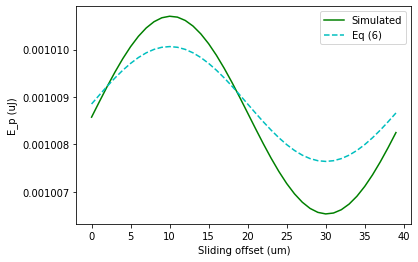

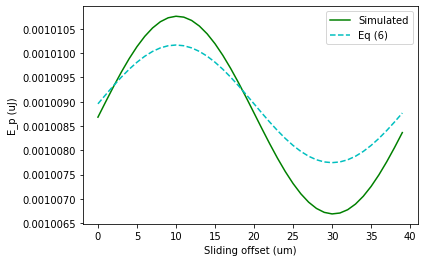

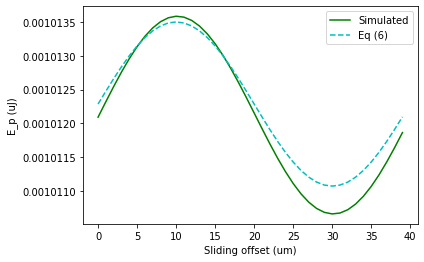

In [6]:
# Plots for the above J_sat trial:

sim_dat_Js1_shifted = sim_dat_Js1[35:]+sim_dat_Js1[0:35]
plt.plot(sim_dat_Js1_shifted, 'g', label="Simulated")
plt.plot(hypo_dat_Js1, '--c', label="Eq (6)")
plt.xlabel('Sliding offset (um)')
plt.ylabel('E_p (uJ)')
plt.legend()
plt.show()

sim_dat_Js2_shifted = sim_dat_Js2[35:]+sim_dat_Js2[0:35]
plt.plot(sim_dat_Js2_shifted, 'g', label="Simulated")
plt.plot(hypo_dat_Js2, '--c', label="Eq (6)")
plt.xlabel('Sliding offset (um)')
plt.ylabel('E_p (uJ)')
plt.legend()
plt.show()

sim_dat_Js3_shifted = sim_dat_Js3[35:]+sim_dat_Js3[0:35]
plt.plot(sim_dat_Js3_shifted, 'g', label="Simulated")
plt.plot(hypo_dat_Js3, '--c', label="Eq (6)")
plt.xlabel('Sliding offset (um)')
plt.ylabel('E_p (uJ)')
plt.legend()
plt.show()

High $J_{sat}$ seems to cause some underestimation

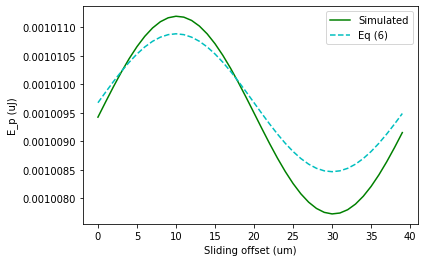

In [7]:
# Effect of increased J_sat on accuracy, example case study for a translative period:
# Parameters same as the Box[3] of data points section except for J_sat

sim_dat_Js1, hypo_dat_Js1, _ = hypothesis_calculator(hc_E_p=0.001, hc_w=25, hc_d_tot=40, hc_p_gph=0.5,\
                                                     hc_J_s=0.00000145) #x10 Js

sim_dat_Js1_shifted = sim_dat_Js1[35:]+sim_dat_Js1[0:35]
plt.plot(sim_dat_Js1_shifted, 'g', label="Simulated")
plt.plot(hypo_dat_Js1, '--c', label="Eq (6)")
plt.xlabel('Sliding offset (um)')
plt.ylabel('E_p (uJ)')
plt.legend()
plt.show()

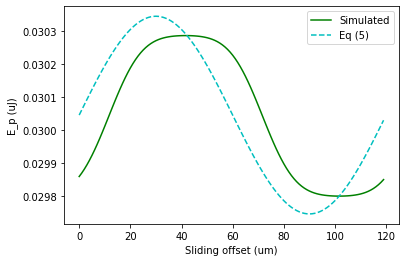

In [8]:
# Checking error of hypothesis, non-tilted; constants as defaulted in tests.py
# d_tot taken much larger than w

sim_dat_large1, hypo_dat_large1, _ = hypothesis_calculator(hc_E_p=0.03, hc_w=20, hc_d_tot=120, hc_p_gph=0.5) # Without clipping

sim_dat_large1_shifted = sim_dat_large1[35:]+sim_dat_large1[0:35]  # Shift not tuned
plt.plot(sim_dat_large1_shifted, 'g', label="Simulated")
plt.plot(hypo_dat_large1, '--c', label="Eq (5)")
plt.xlabel('Sliding offset (um)')
plt.ylabel('E_p (uJ)')
plt.legend()
plt.show()

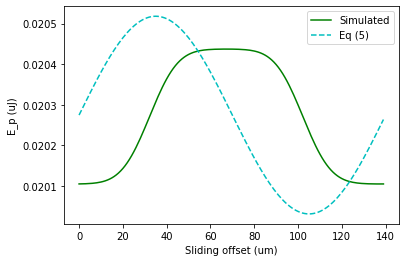

In [9]:
# Checking error of hypothesis, non-tilted; constants as defaulted in tests.py
# d_tot taken much larger than w

sim_dat_large1, hypo_dat_large1, _ = hypothesis_calculator(hc_E_p=0.02, hc_w=20, hc_d_tot=140, hc_p_gph=0.5)  # Without clipping

sim_dat_large1_shifted = sim_dat_large1[35:]+sim_dat_large1[0:35]  # Shift not tuned
plt.plot(sim_dat_large1_shifted, 'g', label="Simulated")
plt.plot(hypo_dat_large1, '--c', label="Eq (5)")
plt.xlabel('Sliding offset (um)')
plt.ylabel('E_p (uJ)')
plt.legend()
plt.show()

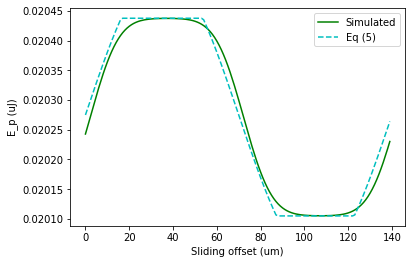

In [10]:
# Repeating with clipping

sim_dat_large1, hypo_dat_large1, _ = hypothesis_calculator(hc_E_p=0.02, hc_w=20, hc_d_tot=140, hc_p_gph=0.5, clipping=True)
sim_dat_large1_shifted = sim_dat_large1[67:]+sim_dat_large1[0:67]
plt.plot(sim_dat_large1_shifted, 'g', label="Simulated")
plt.plot(hypo_dat_large1, '--c', label="Eq (5)")
plt.xlabel('Sliding offset (um)')
plt.ylabel('E_p (uJ)')
plt.legend()
plt.show()

In [11]:
# Checking if Eq.5 yields good results for low graphene percentages

beam_pd_lessgph = generic_tester_Eenc(E_p_vals=[0.01,0.0001], w_vals=[20,30], d_tot_vals=[40,50], p_gph_vals=[0.1,0.2])
print(beam_pd_lessgph.to_latex(index=False))

\begin{tabular}{rrrrrr}
\toprule
    E\_p &     w &  d\_tot &  p\_gph &  err\_pc\_at\_max &  err\_pc\_at\_min \\
\midrule
 0.0100 &  20.0 &   40.0 &    0.1 &      -0.116318 &       0.105197 \\
 0.0100 &  20.0 &   40.0 &    0.2 &      -0.040514 &       0.019421 \\
 0.0100 &  20.0 &   50.0 &    0.1 &      -0.173565 &       0.142540 \\
 0.0100 &  20.0 &   50.0 &    0.2 &      -0.056858 &       0.003066 \\
 0.0100 &  30.0 &   40.0 &    0.1 &      -0.047066 &       0.046941 \\
 0.0100 &  30.0 &   40.0 &    0.2 &      -0.029321 &       0.029084 \\
 0.0100 &  30.0 &   50.0 &    0.1 &      -0.080488 &       0.080084 \\
 0.0100 &  30.0 &   50.0 &    0.2 &      -0.032714 &       0.031951 \\
 0.0001 &  20.0 &   40.0 &    0.1 &      -0.091433 &       0.087682 \\
 0.0001 &  20.0 &   40.0 &    0.2 &       0.007008 &      -0.013962 \\
 0.0001 &  20.0 &   50.0 &    0.1 &      -0.134402 &       0.109239 \\
 0.0001 &  20.0 &   50.0 &    0.2 &       0.018298 &      -0.060718 \\
 0.0001 &  30.0 &   40.0 &

In [12]:
# Checking if Eq.5 yields good results for high graphene percentages

beam_pd_lessgph = generic_tester_Eenc(E_p_vals=[0.01,0.0001], w_vals=[20,30], d_tot_vals=[40,50], p_gph_vals=[0.8,0.9])
print(beam_pd_lessgph.to_latex(index=False))

\begin{tabular}{rrrrrr}
\toprule
    E\_p &     w &  d\_tot &  p\_gph &  err\_pc\_at\_max &  err\_pc\_at\_min \\
\midrule
 0.0100 &  20.0 &   40.0 &    0.8 &      -0.055129 &       0.001456 \\
 0.0100 &  20.0 &   40.0 &    0.9 &      -0.141414 &       0.077789 \\
 0.0100 &  20.0 &   50.0 &    0.8 &      -0.037654 &       0.017111 \\
 0.0100 &  20.0 &   50.0 &    0.9 &      -0.177691 &       0.134728 \\
 0.0100 &  30.0 &   40.0 &    0.8 &      -0.029199 &       0.028448 \\
 0.0100 &  30.0 &   40.0 &    0.9 &      -0.047183 &       0.046292 \\
 0.0100 &  30.0 &   50.0 &    0.8 &      -0.031379 &       0.031246 \\
 0.0100 &  30.0 &   50.0 &    0.9 &      -0.079810 &       0.079345 \\
 0.0001 &  20.0 &   40.0 &    0.8 &       0.009947 &      -0.016344 \\
 0.0001 &  20.0 &   40.0 &    0.9 &      -0.092274 &       0.083122 \\
 0.0001 &  20.0 &   50.0 &    0.8 &       0.058163 &      -0.029135 \\
 0.0001 &  20.0 &   50.0 &    0.9 &      -0.112289 &       0.125376 \\
 0.0001 &  30.0 &   40.0 &

In [13]:
# Checking if Eq.5 yields good results for around d_tot = w

beam_pd_aroundw = generic_tester_Eenc(E_p_vals=[0.01,0.0001], w_vals=[20], d_tot_vals=[21,23], p_gph_vals=[0.5])
print(beam_pd_aroundw.to_latex(index=False))

\begin{tabular}{rrrrrr}
\toprule
    E\_p &     w &  d\_tot &  p\_gph &  err\_pc\_at\_max &  err\_pc\_at\_min \\
\midrule
 0.0100 &  20.0 &   21.0 &    0.5 &      -0.017965 &      -0.019516 \\
 0.0100 &  20.0 &   23.0 &    0.5 &      -0.025487 &      -0.011770 \\
 0.0001 &  20.0 &   21.0 &    0.5 &      -0.005008 &      -0.001578 \\
 0.0001 &  20.0 &   23.0 &    0.5 &      -0.012270 &       0.005563 \\
\bottomrule
\end{tabular}



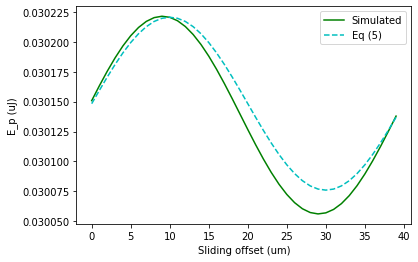

In [23]:
# Checking a tuning case for double layer graphene with the following properties:
# Js=22.5uJ/cm2
# a0=3.05 %
# aS=1.55 %

sim_dat_double, hypo_dat_double, _ = hypothesis_calculator(hc_E_p=0.03, hc_w=25, hc_d_tot=40, hc_p_gph=0.5,\
                                                           hc_a_0=0.0305,hc_a_s=0.0155, hc_J_s=0.000000225,\
                                                           hc_c=0.004)  # Tuning c=0.004

sim_dat_double_shifted = sim_dat_double[30:]+sim_dat_double[0:30]
plt.plot(sim_dat_double_shifted, 'g', label="Simulated")
plt.plot(hypo_dat_double, '--c', label="Eq (5)")
plt.xlabel('Sliding offset (um)')
plt.ylabel('E_p (uJ)')
plt.legend()
plt.show()

In [24]:
# Some generic checks of error percentages for double layer graphene

beam_pd_double = generic_tester_Eenc(E_p_vals=[0.001,0.00001], w_vals=[20,30], d_tot_vals=[40,50], p_gph_vals=[0.3,0.7],\
                                     mask_config=(0.000000225,0.0305,0.0155), constant_c=0.004)
print(beam_pd_double.to_latex(index=False))

\begin{tabular}{rrrrrr}
\toprule
     E\_p &     w &  d\_tot &  p\_gph &  err\_pc\_at\_max &  err\_pc\_at\_min \\
\midrule
 0.00100 &  20.0 &   40.0 &    0.3 &       0.039856 &      -0.087393 \\
 0.00100 &  20.0 &   40.0 &    0.7 &       0.039740 &      -0.103680 \\
 0.00100 &  20.0 &   50.0 &    0.3 &       0.111964 &      -0.215447 \\
 0.00100 &  20.0 &   50.0 &    0.7 &       0.169940 &      -0.181685 \\
 0.00100 &  30.0 &   40.0 &    0.3 &      -0.045306 &       0.044550 \\
 0.00100 &  30.0 &   40.0 &    0.7 &      -0.041286 &       0.044665 \\
 0.00100 &  30.0 &   50.0 &    0.3 &       0.007699 &      -0.010882 \\
 0.00100 &  30.0 &   50.0 &    0.7 &       0.016930 &      -0.012301 \\
 0.00001 &  20.0 &   40.0 &    0.3 &       0.232701 &      -0.308695 \\
 0.00001 &  20.0 &   40.0 &    0.7 &       0.228612 &      -0.343648 \\
 0.00001 &  20.0 &   50.0 &    0.3 &       0.374886 &      -0.549165 \\
 0.00001 &  20.0 &   50.0 &    0.7 &       0.468199 &      -0.497060 \\
 0.00001 &  3

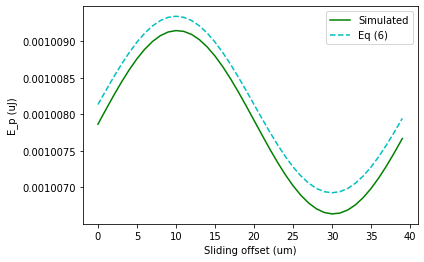

In [2]:
# Sample a_s change:
# Parameters same as the Box[3] of data points section except for a_s

sim_dat_as1, hypo_dat_as1, _ = hypothesis_calculator(hc_E_p=0.001, hc_w=25, hc_d_tot=40, hc_p_gph=0.5,\
                                                     hc_a_s=0.028)

sim_dat_as1_shifted = sim_dat_as1[35:]+sim_dat_as1[0:35]
plt.plot(sim_dat_as1_shifted, 'g', label="Simulated")
plt.plot(hypo_dat_as1, '--c', label="Eq (6)")
plt.xlabel('Sliding offset (um)')
plt.ylabel('E_p (uJ)')
plt.legend()
plt.show()

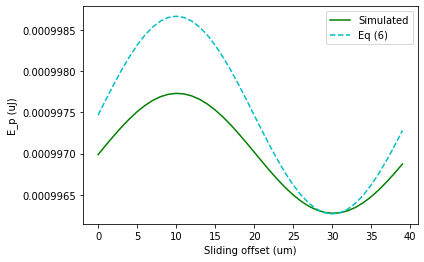

In [3]:
# Sample a_s change:
# Parameters same as the Box[3] of data points section except for a_s

sim_dat_as1, hypo_dat_as1, _ = hypothesis_calculator(hc_E_p=0.001, hc_w=25, hc_d_tot=40, hc_p_gph=0.5,\
                                                     hc_a_s=0.1)

sim_dat_as1_shifted = sim_dat_as1[35:]+sim_dat_as1[0:35]
plt.plot(sim_dat_as1_shifted, 'g', label="Simulated")
plt.plot(hypo_dat_as1, '--c', label="Eq (6)")
plt.xlabel('Sliding offset (um)')
plt.ylabel('E_p (uJ)')
plt.legend()
plt.show()

# So a_s has a say in the constant c as well, and there is a downward shift in average resultant E_p as well, just like a_0 which shows itself at high loss constant ratios

## Some visualization

In [14]:
#Some heat plots of beams, masks, results and so on for the presentation

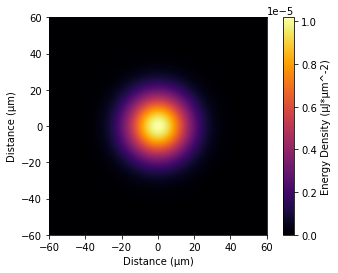

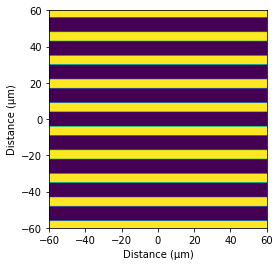

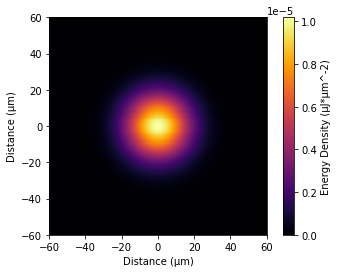

In [15]:
some_beam = beam_initialize_fast(Ep=0.01,w=25,res=30)
some_mask = mask_initialize(beam=some_beam, shape='lines', width=5, thickness=8)
some_result = mask_apply(beam=some_beam, mask=some_mask)
some_result = mask_apply(beam=some_result, mask=some_mask)  # Applying the graphene layer twice for a better visual

plot_heat(some_beam)

m_high = some_mask.dim/(2*some_mask.res)
m_low = -1*m_high
m_extent = [m_low, m_high, m_low, m_high]
plt.imshow(some_mask.matrix, extent=m_extent)
plt.xlabel('Distance (μm)')
plt.ylabel('Distance (μm)')
plt.show()

plot_heat(some_result)